   Unnamed: 0 location        town  mortality  hardness
0           1    South        Bath       1247       105
1           2    North  Birkenhead       1668        17
2           3    South  Birmingham       1466         5
3           4    North   Blackburn       1800        14
4           5    North   Blackpool       1609        18


<AxesSubplot:title={'center':'Correlation between mortality and hardness'}, xlabel='mortality', ylabel='hardness'>

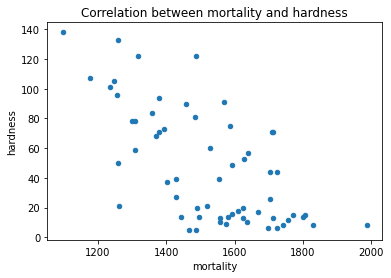

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('water.csv')
print(df.head())

df.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Correlation between mortality and hardness')

In [7]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [9]:
df[['mortality', 'hardness']].corr(method='kendall')
#По рассчитанным коэффициентам корреляции связь между смертностью и жесткостью воды средняя и обратная

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [13]:
X = df[['hardness']]
y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.coef_

array([-3.13167087])

In [15]:
model.intercept_

1668.9722977277095

In [ ]:
#Уравнение регрессии y = -3.13x + 1668.972

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [17]:
model.score(X_test, y_test)

0.5046490611017092

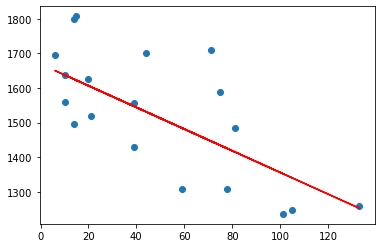

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

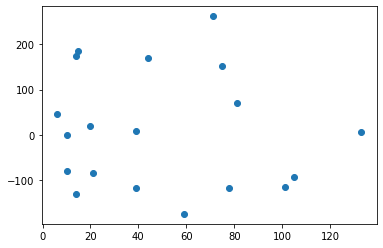

In [34]:
#Гистограмма и график остатков, (данных не так много, поэтому гистограмма не совсем уместна)
res = y_test - y_pred
plt.scatter(X_test, res)

(array([1., 5., 2., 1., 3., 2., 0., 2., 2., 1.]),
 array([-1.75203716e+02, -1.31445711e+02, -8.76877062e+01, -4.39297011e+01,
        -1.71696085e-01,  4.35863090e+01,  8.73443140e+01,  1.31102319e+02,
         1.74860324e+02,  2.18618329e+02,  2.62376334e+02]),
 <BarContainer object of 10 artists>)

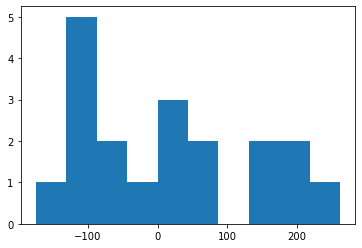

In [33]:
plt.hist(res)

# Южные районы

In [39]:
df1 = df.loc[df['location'] == 'South']
df1

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


<AxesSubplot:title={'center':'Correlation between mortality and hardness at South regions'}, xlabel='mortality', ylabel='hardness'>

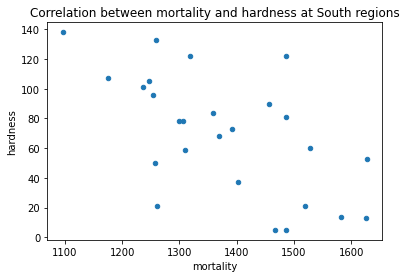

In [41]:
df1.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Correlation between mortality and hardness at South regions')

In [42]:
df1[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [43]:
df1[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [44]:
df[['mortality', 'hardness']].corr(method='kendall')
#По рассчитанным коэффициентам корреляции связь между смертностью и жесткостью воды в южных регионах средняя и обратная 
#Причем связь слабее

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [47]:
X = df1[['hardness']]
y = df1['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
model.coef_

array([-3.51342921])

In [49]:
model.intercept_

1640.2204603423374

In [50]:
#Уравнение регрессии y = -3.51x + 1640.22

In [51]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)
#Плохое качество модели

-2.551922301235205

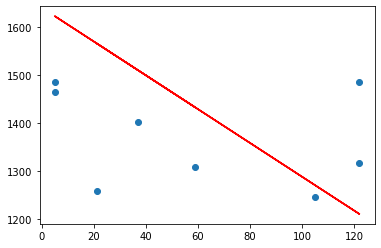

In [52]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

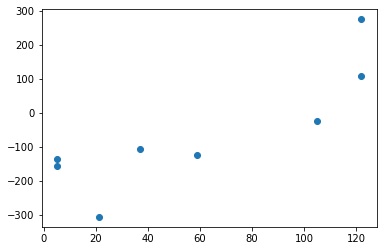

In [54]:
#График остатков
res = y_test - y_pred
plt.scatter(X_test, res)

# Северные районы

In [56]:
df2 = df.loc[df['location'] == 'North']
df2

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


<AxesSubplot:title={'center':'Correlation between mortality and hardness at North regions'}, xlabel='mortality', ylabel='hardness'>

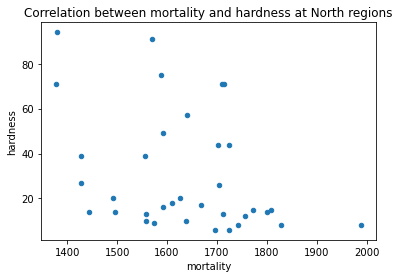

In [57]:
df2.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Correlation between mortality and hardness at North regions')

In [58]:
df2[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [59]:
df2[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [60]:
df2[['mortality', 'hardness']].corr(method='kendall')
#По рассчитанным коэффициентам корреляции связь между смертностью и жесткостью воды в южных регионах средняя и обратная 
#Причем связь еще слабее

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


In [61]:
X = df2[['hardness']]
y = df2['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
model.coef_

array([-1.97686226])

In [63]:
model.intercept_

1688.150229031281

In [64]:
#Уравнение регрессии y = -1.98x + 1688.15

In [65]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)
#Плохое качество модели

0.018885304285745863

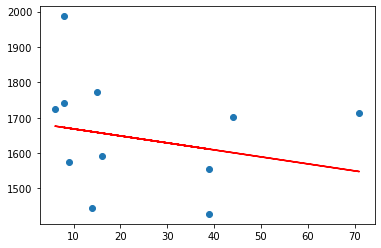

In [66]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

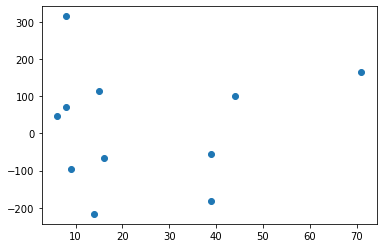

In [67]:
#График остатков
res = y_test - y_pred
plt.scatter(X_test, res)

In [ ]:
# При разделении на группы получили модели качеством хуже, чем в объединенной выборке